<a href="https://colab.research.google.com/github/fabian57fabian/OptimizationMethodsVisualizer/blob/main/OptimizationMethodsVisualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Methods Visualizer in Python

This notebook was created to give a visual understanding about Optimization Methods algotythms.


# Libraries initialization

The blocks below will set up the environment with necessary libraries.

Run the following cell to set up the system.

In [200]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
!pip install simpy

# Defining target function, constraints

Now let's create a function! we could either define one or create a lambda. Do as you wish.

In [18]:
#f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2
def f(x,y):
  return (x-1)**2+y**2#(1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

Define constraints as a list of lambdas

In [258]:
constraints = [
               #lambda x, y: (x+2*y >=1),
               #lambda x, y: (x >= 0),
               #lambda x, y: (y >= 0),
               lambda x, y: (x >= y),
               #lambda x, y: (2*x -y <= 1),
               lambda x, y: (x**2 <= y),
]

# Plot feasible region

In order to plot our important data we will specify the domain:

In [259]:
xmin, xmax, xstep = -4.5, 4.5, .1
ymin, ymax, ystep = -4.5, 4.5, .1

Then we can store all the x and y points of our function directly into a mesh grid. Execute following block to create it.

In [260]:
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)

Now remove constrained space

In [261]:
for c in constraints:
  z[c(x,y)] = np.nan

## Plotting 3d

In order to do a simple 2d plot, just create a figure and give the preprocessed coordinates.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning:

Z contains NaN values. This may result in rendering artifacts.



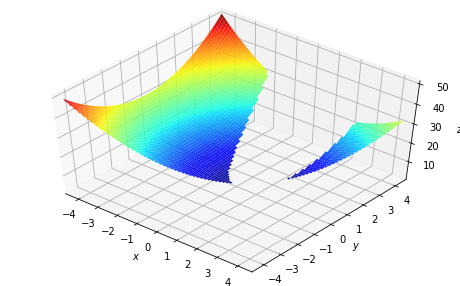

In [262]:
from matplotlib.colors import LogNorm
import matplotlib.colors as colors

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

cmap = plt.cm.jet
cmap.set_bad('w',1.)
surf = ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=.95, rstride=1, cstride=1, edgecolor='none',vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
#surf = ax.contour3D(x, y, z,50, cmap=plt.cm.jet, alpha=.95, vmin=np.nanmin(z), vmax=np.nanmax(z))#norm=colors.LogNorm(vmin=z.min(), 
 
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# Rotate the view
#ax.view_init(60, -80) 

plt.show()



Great now we can see how our function image in the corrisponding domain.

Colors are calculated by LogNorm matplotlib color object.

## Plotting 2d

Let's now plot using only 2 dimensions but this time calculating gradient vector field and plotting it with mpl quiver's method:

In [263]:
from autograd import elementwise_grad, value_and_grad
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

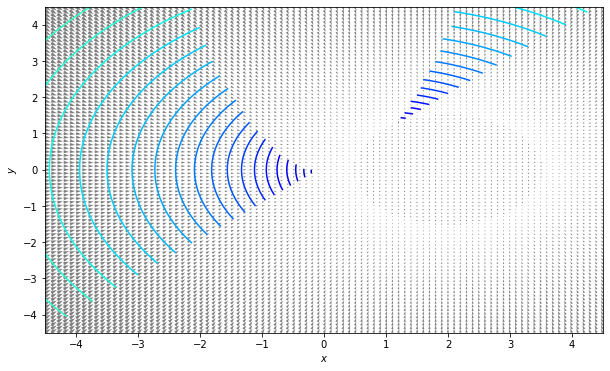

In [280]:
fig, ax = plt.subplots(figsize=(10, 6))
min, max = np.nanmin(z), np.nanmax(z)
ax.contour(x, y, z, levels=np.logspace(0, 4, 50), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
#ax.plot(*minima_, 'r*', markersize=18)

ax.plot()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()